## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = False

# 
# YOUR CODE HERE
# 
student_self_assessment = True

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 3 (Basic problems)
### Learning from data [TIF285], Chalmers, Fall 2025

Last revised: 29-Sep-2025 by Christian Forssén [christian.forssen@chalmers.se]

In [3]:
import os
# Data files are stored in
DATA_DIR = "DataFiles/"

if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

## Problem 1: Assigning probabilities for a hundred-sided dice (2 points)

Consider a hundred-sided dice (labeled with 1, 2, 3, ..., 100) for which you know 

Case 1. that the mean of a large number of rolls is $\mu_1 = \frac{1}{100}\sum_{i=1}^{100} i$.

Case 2. that the mean of a large number of rolls is $\mu_2=40$ and that the standard deviation is $\sigma_2=25$.

### (a) Analytical MaxEnt derivation of the probability distributions
**Task (see also Yata)**
* Use the principle of maximum entropy to assign the probabilities $\{ p_i \}_{i=1}^{100}$ for the outcomes of a dice roll in the two different cases. Employ the method of Lagrange multipliers to derive (analytical) expressions for $p_i$.
* Your expressions should contain the (yet undetermined) Lagrange multipliers.
* Use the markdown cell below to perform the analytical derivation and present the results for $p_i$ in case 1 and case 2. Start by writing down the expression for the entropy with the relevant Lagrange-multiplier terms.

*Hint: There are various constraints from the known information: the normalization of the probabilities $\mathcal{N} = \sum_i p_i = 1$ and the mean result $\mu=\sum_i i p_i$. In case 2 there is also a third constraint in the variance $\sigma^2 = \sum_i (i-\mu)^2 p_i$. Set the so called Lebesque measure $m_i = 1 \; \forall i$.*

* * *
**Case 1:**

The entropy is given by: $Q = -\sum_{i=1}^{100}p_i\log(p_i) + \lambda_0(1-\sum_{i=1}^{100}p_i) + \lambda_1(\mu-\sum_{i=1}^{100}ip_i)$. 

To maximize the entropy: $0 = \frac{\partial Q}{\partial p_i} = -\log(p_i) - 1 - \lambda_0 - i\lambda_1$

$\implies \log(p_i) = - 1 - \lambda_0 - i\lambda_1$

$\implies p_i = e^{-(1 + \lambda_0 + i\lambda_1)}$


**Case 2:**

The entropy is given by: $Q = -\sum_{i=1}^{100}p_i\log(p_i) + \lambda_0(1-\sum_{i=1}^{100}p_i) + \lambda_1(\mu-\sum_{i=1}^{100}ip_i) + \lambda_2(\sigma^2-\sum_{i=1}^{100}(i-\mu)^2p_i)$. 

To maximize the entropy: $0 = \frac{\partial Q}{\partial p_i} = -\log(p_i) - 1 - \lambda_0 - i\lambda_1 - \lambda_2(i-\mu)^2$

$\implies \log(p_i) = - 1 - \lambda_0 - i\lambda_1 - \lambda_2(i-\mu)^2$

$\implies p_i = e^{-(1 + \lambda_0 + i\lambda_1 + \lambda_2(i-\mu)^2)}$
* * *

### (b) Determination of the Lagrange multipliers
**Tasks (see also Yata)**
* Determine the still unknown Lagrange multipliers; 
  - for case 1 they can be derived analytically, but it is also allowed to determine them numerically.
  - for numerical determination you might find that it works better to use `scipy.fsolve` to find the root of $\partial Q / \partial p_i$ (where $Q$ is the constrained entropy) than to use `scipy.optimize` to find the maximum of $Q$.
* Print the values of the Lagrange multipliers for each case.
* Assign the probabilities and make a bar plot for each case. Store the probabilities in the arrays `probs_1` and `probs_2`, each of shape (100,).

In [4]:
# importing modules
import numpy as np
import matplotlib.pyplot as plt
#...

# 
# YOUR CODE HERE
#
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import emcee as emcee

C:\Users\elsaz_6\AppData\Local\Temp\ipykernel_10756\3058786651.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  p[i] = np.exp(-(1+(i+1)*lam))


[1.43603319e-17] 3.6051701859880905
[0.00956483 0.00030181] 2.946030719028025


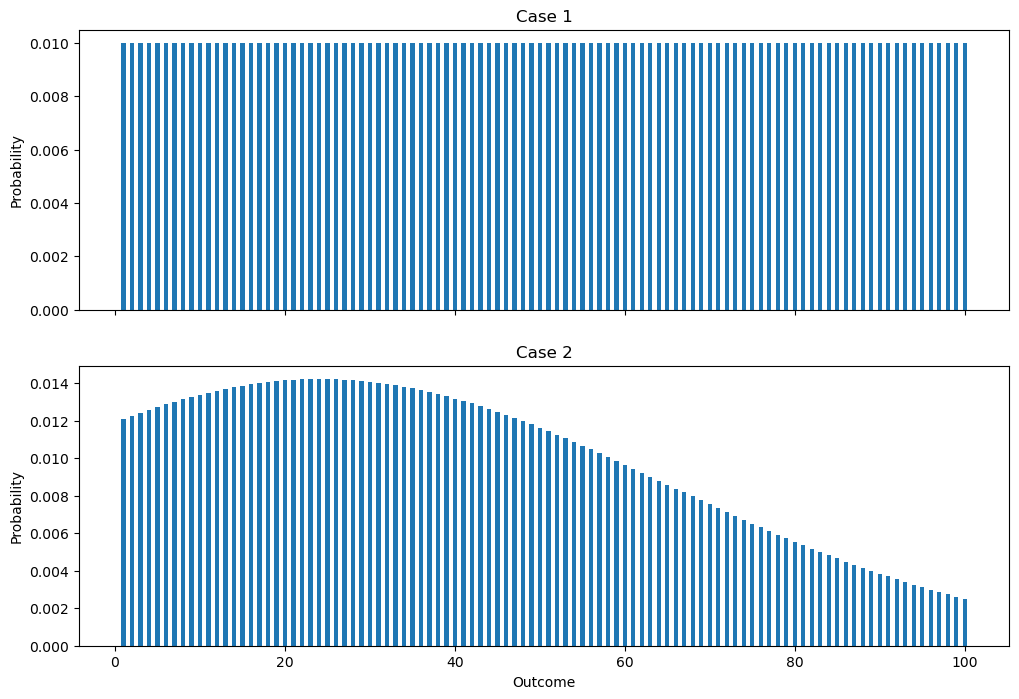

In [5]:
# We suggest to define helper functions (but you are free to use your own solution)
#
def pdf_1(lam, M=100, return_norm=False):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier. Case a.
    
    Args:
        lam: Lagrange multiplier (float)
        M: number of discrete probabilities (int). Default = 100
        return_norm: Returns the normalization factor as a second variable (boolean). Default = False
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_1(i,lam) / norm
    '''
    # 
    # YOUR CODE HERE
    # 
    p = np.zeros((M,))
    for i in range(M):
        p[i] = np.exp(-(1+(i+1)*lam))
    norm = np.sum(p)
    p /= norm
    if return_norm: 
        return p, norm
    else:
        return p    

def pdf_2(lam1, lam2, mu, M=100, return_norm=False):
    '''
    Returns an array of (normalized) probabilities for a given Lagrange multiplier and mean. Case b.
    
    Args:
        lam1: Lagrange multiplier for the mean constraint (float)
        lam2: Lagrange multiplier for the variance constraint (float)
        mu: mean value (float)
        M: number of discrete probabilities (int). Default = 100
        return_norm: Returns the normalization factor as a second variable (boolean). Default = False
        
    Returns:
        pdf: Array of shape (M,) of probabilities p_i = f_2(i,lam1,lam2,mu) / norm
    '''
    # 
    # YOUR CODE HERE
    # 
    p = np.zeros((M,))
    for i in range(M):
        p[i] = np.exp(-(1+(i+1)*lam1+lam2*(i+1-mu)*(i+1-mu)))
    norm = np.sum(p)
    p /= norm
    if return_norm: 
        return p, norm
    else:
        return p

def moments(pdf):
    '''
    Returns the first few moments of a discrete pdf.
    
    Args:
        pdf: Array of shape (M,) of probabilities p_i
        
    Returns:
        moments: tuple of floats with the first few moments (norm, mean, variance) 
    '''
    # 
    # YOUR CODE HERE
    # 
    norm = np.sum(pdf)
    mean = np.mean(pdf)
    variance = np.var(pdf)
    return norm, mean, variance
    
# and to use the principle of maximum entropy to assign the probabilities 
Msides = 100
probs_1 = np.ones(Msides)
probs_2 = np.ones(Msides)


def dQ_1(lam):
    mu_1 = 50.5
    p = pdf_1(lam)
    M = len(p)
    dQ_1 = mu_1 - np.sum(p*np.arange(1, Msides+1))
    return dQ_1

def dQ_2(lam):
    lam_1 = lam[0]
    lam_2 = lam[1]
    mu_2 = 40
    sigma = 25
    p = pdf_2(lam_1, lam_2, mu_2)
    M = len(p)
    dQ_lam1 = mu_2 - np.sum(p*np.arange(1, Msides+1)) 
    dQ_lam2 = sigma*sigma - np.sum(((np.arange(1,Msides+1)-mu_2)**2)*p)
    return dQ_lam1, dQ_lam2

lam_sol = scipy.optimize.fsolve(dQ_1, [0.1])
probs_1 = probs_1*pdf_1(lam_sol)
print(lam_sol, np.log(pdf_1(lam_sol, return_norm=True)[-1]))

lam_sol2 = scipy.optimize.fsolve(dQ_2, [0.01,0.01])
probs_2 = probs_2*pdf_2(lam_sol2[0], lam_sol2[1], 40)
print(lam_sol2, np.log(pdf_2(lam_sol2[0], lam_sol2[1], 40, return_norm=True)[-1]))


# Don't forget to also make a bar plot
# 
# YOUR CODE HERE
# 
x = np.arange(1, Msides+1)
fig, ax = plt.subplots(2,1, sharex=True, figsize=(12, 8))
ax[0].bar(x, probs_1, width=0.5)
ax[0].set_title('Case 1')
ax[0].set_ylabel('Probability')
ax[1].bar(x, probs_2, width=0.5)
ax[1].set_title('Case 2')
ax[1].set_xlabel('Outcome')
ax[1].set_ylabel('Probability')
plt.show()

In [6]:
for iprobs, probs in enumerate([probs_1,probs_2]):
    assert probs.shape == (100,), f'The array `probs` for case {iprobs} should be of shape (100,). probs.shape = {probs.shape}'
    assert np.abs(probs.sum()-1.0)<1e-6, f'The norm of array `probs` for case {iprobs} is {probs.sum}'

iside = np.arange(100)+1
pdf_means=np.array([0.,0.])
pdf_variances=np.array([0.,0.])
for iprobs, probs in enumerate([probs_1,probs_2]):
    pdf_means[iprobs] = np.sum(probs*iside)
    pdf_variances[iprobs] = np.sum((iside-pdf_means[iprobs])**2*probs)
assert (np.abs(pdf_means-np.array([50.50,40]))<1e-4).all(), f'The mean values are: {pdf_means}'
assert (np.abs(pdf_variances-np.array([833.25,625.]))<1e-3).all(), f'The variances are: {pdf_variances}'

## Problem 2: Hypothesis testing using p-values (2 points)

Assume that you are analyzing a time series of data from an experiment that is searching for an annual modulation on top of a constant background. For example, an experiment that succeeds in detecting a flux of dark matter particles reaching the earth's surface would be expected to observe an annual modulation of the signal. 

The time series of data consists of $N$ measurements that extends over a period of 5 years. The measurements are presented in some re-scaled, dimensionless units. From calibration measurements it is known that experimental errors are normal distributed with a standard deviation $\sigma = 5.0$.

### (a) The chi-squared statistic and the null hypothesis
**Tasks (see also Yata)**
* Read the three different data sets. Each of the sets contains a constant background and might, or might not, include an annual modulation signal.
* Compute, for each case, the chi-squared statistic: $\chi^2 = \sum_{i=1}^N \frac{( y_i - \bar{y} )^2}{\sigma^2}$, where the average value $\bar{y}$ is estimated from the sample $\{ y_i \}_{i=1}^{N}$. Implement the chi-squared statistic via the function `chi2_statistic` below.
* Consider as null hypothesis the scenario that the signal is *constant*, albeit with an unknown amplitude. Generate a large number (M=1000) of hypothetical data sets (each with the same number of data, $N$, as the real experimental sets) from the assumption that the null hypothesis is true. The background should be set randomly for each realization and data should be generated with noise given the knowledge about statistical errors. To be specific, you can sample the background from a uniform distribution in [10,200] and the noise from a normal distribution with standard deviation $\sigma = 5.0$.
* Compute the chi-squared statistic for each hypothetical data set. How large fraction of the generated null-hypothesis data sets give a chi-squared statistic that is larger than the value for each of the three measured data sets?

In [7]:
# importing modules

import numpy as np
import matplotlib.pyplot as plt
#...

# 
# YOUR CODE HERE
# 

In [8]:
def chi2_statistic(y,dy):
    """
    Compute the chi-squared statistic for a set of data with known error and an unknown, constant background.

    Since the background is unknown, the computation of the chi-squared statistic requires an estimation of the mean from the sample.
        
    Args:
        y: data, array of floats 
        dy: (float) fixed error, standard deviation of a normal distribution
        
    Returns:
        (float) chi-squared statistic
    """
    # 
    # YOUR CODE HERE
    # 
    y_mean = np.mean(y)
    chi2 = 1/(dy*dy)*np.sum((y - y_mean)*(y - y_mean))
    return chi2

In [9]:
# Read the data and perform the tasks listed above
# Save the chi-squared statistic in a list `chi2_from_data`
chi2_from_data = []

for icase in range(3):
    print(f'Read data for case {icase:>2}')
    t,y = np.loadtxt(f'{DATA_DIR}/PS3_Prob2_data{icase}.txt',unpack=True)
    
    # 
    # YOUR CODE HERE
    # 
    dy = 5.
    chi2 = chi2_statistic(y, dy)
    chi2_from_data.append(chi2)
print(chi2_from_data)


Read data for case  0
Read data for case  1
Read data for case  2
[np.float64(78.0277824334381), np.float64(81.02055826651912), np.float64(73.40867815476433)]


In [10]:
# 
# YOUR CODE HERE
# 
M = 1000
N = 60
chi2_generated_data = []

for i in range(M): 
    #uniform background
    rng1 = np.random.default_rng()
    background = rng1.uniform(10., 200.)

    #normal distribution for errors
    dy = 5.
    rng2 = np.random.default_rng()
    errors = rng2.normal(0., dy, N)

    #generated data
    data = background + errors

    #chi^2
    chi2 = chi2_statistic(data, dy)
    chi2_generated_data.append(chi2)

chi2_generated_data = np.array(chi2_generated_data)

fraction = []
for chi2 in chi2_from_data:
    n = np.sum(chi2<chi2_generated_data)
    frac = n/M
    fraction.append(frac)
print(f'Fraction of chi^2 larger than for data0: {fraction[0]}')
print(f'Fraction of chi^2 larger than for data1: {fraction[1]}')
print(f'Fraction of chi^2 larger than for data2: {fraction[2]}')

Fraction of chi^2 larger than for data0: 0.048
Fraction of chi^2 larger than for data1: 0.028
Fraction of chi^2 larger than for data2: 0.107


### (b) p-values and null hypothesis rejection
**Tasks (see also Yata)**
* Make a plot of the expected $\chi^2$ distribution for the relevant number of degrees of freedom and compare with the statistic obtained for the actual data in each case.
* What is the *P-value* or *significance* of the data (for each case) from a frequentist point of view? Does it agree with your observation from the hypothetical null hypothesis data sets?
* Assume that we have decided beforehand the significance level 5% for this test. Would you *reject the null hypothesis with 95% confidence* for each particular case?

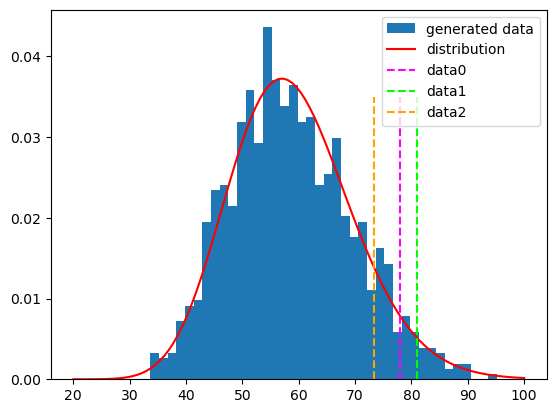

P value for data0: 0.04923703026085879
P value for data1: 0.03016033757153167
P value for data2: 0.09819824452293328


In [11]:
# Read the data and perform the tasks listed above
#
# 
# YOUR CODE HERE
# 
x = np.linspace(20, 100, 100)
plt.hist(chi2_generated_data, bins=40, density=True, label='generated data')
plt.plot(x, scipy.stats.chi2.pdf(x, N-1), label='distribution', color='red')

plt.vlines(chi2_from_data[0], 0., 0.035, linestyle='--', color='magenta', label='data0')
plt.vlines(chi2_from_data[1], 0., 0.035, linestyle='--', color='lime', label='data1')
plt.vlines(chi2_from_data[2], 0., 0.035, linestyle='--', color='orange', label='data2')
plt.legend()
plt.show()

print(f'P value for data0: {scipy.stats.chi2.sf(chi2_from_data[0], N-1)}')
print(f'P value for data1: {scipy.stats.chi2.sf(chi2_from_data[1], N-1)}')
print(f'P value for data2: {scipy.stats.chi2.sf(chi2_from_data[2], N-1)}')

## Problem 3: Gaussian Process regression (3 points)

In the following we will perform Gaussian Process (GP) regression of a simulated data set and explore
- The prior prediction of a GP regression model with fixed hyperparameters.
- The posterior prediction of a GP regression model with fixed hyperparameters but conditioned on training data.
- The dependence on the choice of kernel hyperparameters for this GP prediction.
- The optimization of kernel hyperparameters by minimization of the training data negative (log) likelihood.
For simplicity, we will consider a problem in which both the independent data ($x$) and the targets are one-dimensional.

### (a) The kernel and the prior GP

Here, we will use the RBF kernel with a constant signal variance ($\sigma_f^2$) plus a diagonal, white noise term

$$
C({x}_i,{x}_j) = \sigma_f^2 \exp\left(-\frac{1}{2l^2}
  ({x}_i - {x}_j)^2\right) + \sigma_\nu^2 \delta_{{x}_i, {x}_j}
$$

The correlation length $l$ controls the smoothness of the GP samples and $\sigma_f$ the vertical variation. We note that this kernel is stationary as it only depends on the distance $\Delta x_{ij} \equiv {x}_i - {x}_j$.

This kernel function gives the elements of an $N \times N$ covariance matrix $C(\mathbf{X}_N,\mathbf{X}_N)$ that describes a GP for the set of positions $\mathbf{X}_N = \{ x_1, x_2, \ldots, x_N \}$. Since we will eventually use the kernel function to construct different blocks of a covariance matrix, we will rather implement the computation of a general $N \times M$ matrix $C(\mathbf{X}_N,\mathbf{X}'_M)$ where $\mathbf{X}_N$ and $\mathbf{X}'_M$ can be two different sets of positions of lengths $N$ and $M$, respectively.

**Tasks (see also Yata)**
- Complete the `RBFkernel` and `cov_RBF` functions below to include the possibility of adding a fixed white noise. Note that this term should only be added when $x_i = x_j$.
- Complete also the `GPplot` function below to add the functionality of randomly drawing samples from the GP and plotting them together with the mean vector and credible interval (the plottings of which are already implemented).
- Use this functionality to show the prior over functions with mean zero and a covariance matrix obtained with kernel parameters (a) $\sigma_f^2=1.$, $l=2.$, and (b) $\sigma_f^2=0.25$, $l=0.25$. In both cases there is a white noise $\sigma_\nu^2=0.01$.  Plot these prior predictions in two figure panels (one per choice of hyperparameters) for the interval $x \in[-5,5]$. Use the newly implemented functionality of `GPplot` to show 5 samples for each prior.

Useful code blocks can be found in the GP demonstration notebook in the lecture notes.

In [12]:
import numpy as np

def RBFkernel(dX, alpha=np.array([1,1]), nugget=0.):
    """
    The stationary RBF kernel function for a one-dimensional space. 
    
    The distance matrix can be an arbitrarily shaped numpy array so make sure to
    use functions like `numpy.exp` for exponentiation.
    
    Args:
        dX: distance matrix. Array (N_row,N_col)
        alpha: List-like. Hyperparameters corresponding to [RBF signal variance, RBF correlation length].
        nugget: Fixed, diagonal white noise variance
        
    Returns:
        Kernel elements. Array with same shape as dX.
    """
    # 
    # YOUR CODE HERE
    # 
    N, M = np.shape(dX)
    C_nonoise = alpha[0]*np.exp(-1/(2*alpha[1]**2)*dX**2)
    noise = nugget*np.eye(N, M)
    C_noise = C_nonoise + noise
    return C_noise

def cov_RBF(X_row, X_col, alpha=np.array([1,1]), nugget=0.):
    """
    Construct the covariance matrix for input positions X_row x X_col
        
    Args:
        X_row: list-like, length N_row
        X_col: list_like, length N_col
        alpha: hyperparameters [RBF signal variance, RBF correlation length]
        nugget: Fixed, diagonal white noise variance
        
    Returns:
        Covariance matrix. Shape (N_row, N_col)
    """
    N_row = len(X_row)
    X_row = np.array(X_row).reshape(N_row,1)
    N_col = len(X_col)
    X_col = np.array(X_col).reshape(N_col,1)

    X_row_tile = np.tile(X_row,N_col)
    # dX array is of shape (N_row, N_col)
    dX = X_col.T - X_row_tile
       
    # 
    # YOUR CODE HERE
    # 
    return RBFkernel(dX, alpha, nugget)

In [13]:
# Utility function for plotting a GP prediction with credible interval
import scipy.stats as stats

def GPplot(X_new, mu_new, cov_new, ax=None, credibility=0.95, showsamples=False, numsamples=3):
    """
    Plot predictions of the GP regression model.

    Args:
        X_new: New input locations. List-like of length N_new.
        mu_new: GP regressor mean predictions. Array of shape (N_new,1).
        cov_new: GP regressor mean predictions. Array of shape (N_new, N_new).
        ax: Axes handle for plot. Will be created and returned if None. (default None)
        credibility: probability mass to include in the posterior prediction (float<1, default=0.95)
        showsamples: Include random draws from the GP in the plot. (boolean, default=False)
        numsamples: Number of random draws from the GP shown in the plot. (int, default=3, 
            max allowed=10). Ignored if 'samples'=False
    
    Returns:
        Axes handle
    """
    assert credibility < 1.
    assert credibility > 0.
    # Determine the width of the band
    bandwidth_factor = stats.norm.interval(credibility)[1]
       
    X_new = np.array(X_new).reshape(-1,1)
        
    credible_range_distance = bandwidth_factor * np.sqrt(np.diag(cov_new)).flatten()

    if ax is None:
        fig, ax = plt.subplots(1,1)
    ax.fill_between(X_new.flatten(), mu_new.flatten() + credible_range_distance, \
                    mu_new.flatten() - credible_range_distance, alpha=0.1, label='Credible range')
    ax.plot(X_new, mu_new, label='Mean')

    # 
    # YOUR CODE HERE
    #
    if showsamples:
        N = np.shape(X_new)
        rng = np.random.default_rng()
        samples = rng.multivariate_normal(mu_new, cov_new, size=numsamples).T
        ax.plot(Xp, samples, label=[f'Samples {i+1}' for i in range(numsamples)])
    return ax

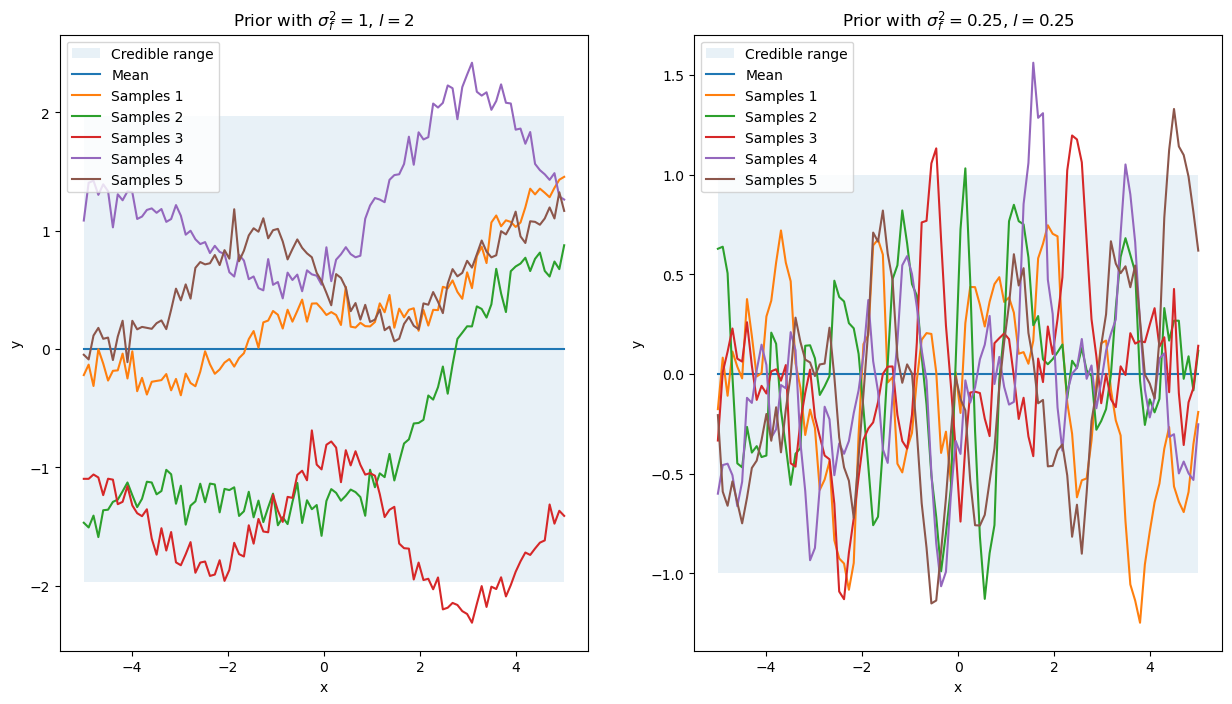

In [14]:
# Plot the prior over functions for hyperparameter choices (a) and (b)

# Finite number of points for predictions
Xp = np.linspace(-5, 5, 100).reshape(-1, 1)

# 
# YOUR CODE HERE
# 
fig, ax = plt.subplots(1,2, figsize=(15, 8))
cov = cov_RBF(Xp, Xp, alpha=np.array([1.,2.]), nugget=0.01)
ax[0] = GPplot(Xp, np.zeros_like(Xp.flatten()), cov, ax=ax[0], credibility=0.95, showsamples=True, numsamples=5)
ax[0].legend()
ax[0].set_title(r'Prior with $\sigma_f^2 = 1$, $l = 2$')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

cov = cov_RBF(Xp, Xp, alpha=np.array([0.25, 0.25]), nugget=0.01)
ax[1] = GPplot(Xp, np.zeros_like(Xp.flatten()), cov, ax=ax[1], credibility=0.95, showsamples=True, numsamples=5)
ax[1].legend()
ax[1].set_title(r'Prior with $\sigma_f^2 = 0.25$, $l = 0.25$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

plt.show()

### (b) The posterior and hyperparameter optimization

The `sklearn.gaussian_process` library is needed to solve this task. 

Scikit-learn provides a `GaussianProcessRegressor` for implementing [GP regression models](http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr). It can be configured with [pre-defined kernels and user-defined kernels](http://scikit-learn.org/stable/modules/gaussian_process.html#gp-kernels). Kernels can be composed from several ingredient kernels. The squared exponential kernel is the `RBF` kernel in scikit-learn. The `RBF` kernel only has a `length_scale` parameter which corresponds to the $l$ parameter above. To have a $\sigma_f$ parameter as well, we have to multiply the `RBF` kernel with a `ConstantKernel`.

Tunable white noise can be included via the `WhiteKernel`. However, in these tasks we will include **fixed** noise via the `alpha` argument of the `GaussianProcessRegressor` function. This argument provides a value that is added to the diagonal of the kernel matrix during fitting. It is not, however, included in the covariance matrix when making predictions. See the remark in the tasks listed below.

**Tasks (see also Yata)**
- Set up the corresponding GP regression model using `sklearn`. See the example from the GP demonstration notebook in the lecture notes. Here we will include white noise via the `alpha` argument of the `GaussianProcessRegressor` function.

  **Important**: Set `optimizer=None` and `normalize_y=False` in this task.
- Fit this GP regression model to a set of training data (to be loaded from file). Since you have set `optimizer=None`, the hyperparameters will be kept fixed when fitting the GP regression model to the data. In the final subtask, we will optimize the hyperparameters.
- Make posterior predictions for the interval $x \in[-5,5]$. Extract the mean vector and covariance matrix and plot these posterior predictions in two figure panels (one panel per fixed set of hyperparameters, case (a) and (b)). Use the functionality of `GPplot` to show 5 samples for each posterior. Also add the training data to the panels.

  **Important** Include the argument `return_cov=True`to extract the mean vector and the covariance matrix from the `sklearn` GP regression model functionality `predict()`. Note that the white noise is not included when making predictions with `sklearn` including just an RBF kernel. Here, it has to be added manually to the returned covariance matrix by adding `nugget` to the diagonal elements.

In [15]:
# 
# YOUR CODE HERE
# 
import sklearn
nugget = 0.01

kernel1 = sklearn.gaussian_process.kernels.ConstantKernel(1.0) * sklearn.gaussian_process.kernels.RBF(length_scale=2.0)
GP1 = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel1, alpha=nugget, optimizer=None, normalize_y=False)

kernel2 = sklearn.gaussian_process.kernels.ConstantKernel(0.25) * sklearn.gaussian_process.kernels.RBF(length_scale=0.25)
GP2 = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel2, alpha=nugget, optimizer=None, normalize_y=False)

In [16]:
# Below is a hidden code block that is used in the solution notebook to generate and save the data. 
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
#
filename = f'{DATA_DIR}PS3_Prob3_data.txt'
# 
# YOUR CODE HERE
# 

X_train,Y_train = np.loadtxt(filename, unpack=True)

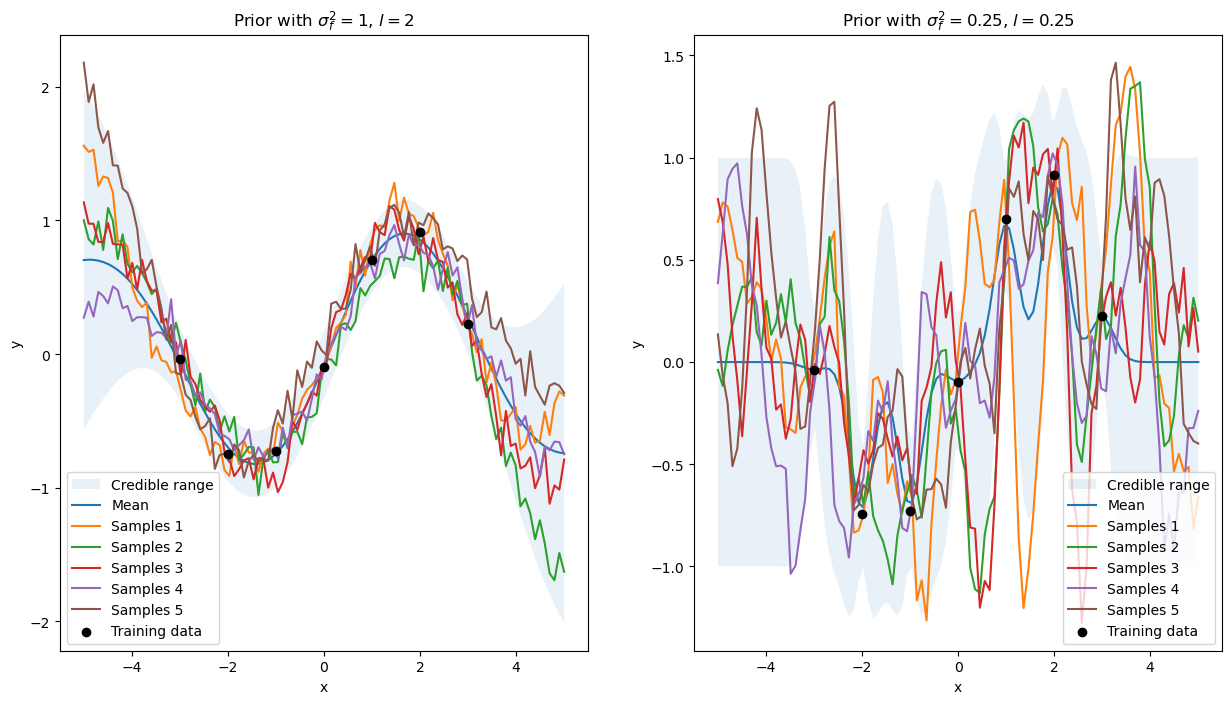

In [17]:
# 
# YOUR CODE HERE
# 
X_train = X_train.reshape(-1, 1)
GP1.fit(X_train, Y_train)
GP2.fit(X_train, Y_train)

Xp = np.linspace(-5, 5, 100).reshape(-1, 1)
mu1_fit, cov1_fit = GP1.predict(Xp, return_cov=True)
mu2_fit, cov2_fit = GP2.predict(Xp, return_cov=True)

fig, ax = plt.subplots(1,2, figsize=(15, 8))

N, M = np.shape(cov1_fit)

cov1 = cov1_fit + nugget*np.eye(N, M)
ax[0] = GPplot(Xp, mu1_fit, cov1, ax=ax[0], credibility=0.95, showsamples=True, numsamples=5)
ax[0].scatter(X_train, Y_train, label='Training data', color='black', zorder=10)
ax[0].legend()
ax[0].set_title(r'Prior with $\sigma_f^2 = 1$, $l = 2$')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

cov2 = cov2_fit + nugget*np.eye(N, M)
ax[1] = GPplot(Xp, mu2_fit, cov2, ax=ax[1], credibility=0.95, showsamples=True, numsamples=5)
ax[1].scatter(X_train, Y_train, label='Training data', color='black', zorder=10)
ax[1].legend()
ax[1].set_title(r'Prior with $\sigma_f^2 = 0.25$, $l = 0.25$')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

### (c) Implement your own posterior prediction

**Tasks (see also Yata)**

This subtask requires you to create your own implementation of the GP posterior prediction. You can still get points for the first two subtasks if you don't finish this one.
- Perform a fit of hyperparmaters using functionality in `sklearn`. Again, see the example from the GP demonstration notebook in the lecture notes. You will have to set up the GP model with an optimizer. The default is `optimizer="fmin_l_bfgs_b"` which should work fine. Extract and print the values of the optimized hyperparameters $\sigma_{f,\mathrm{opt}}^2$ and $l_\mathrm{opt}$.
- Plot the posterior prediction with this single, optimized set of hyperparameters for the interval $x \in[-5,5]$. Use the functionality of `GPplot` to show 5 samples.

  **Important** Include the argument `return_cov=True`to extract the mean vector and the covariance matrix from the `sklearn` GP regression model functionality `predict()`. Note that the white noise is not included in the returned covariance matrix. It has to be added manually by adding `nugget` to the diagonal elements.
- Write your own `Predict` function (see code below). Use the functionality implemented in the first subtask.
- Perform the fit to the training data with the optimized hyperparameters that you just determined using `sklearn`. Check that you produce the same GP posterior as with the optimized `sklearn` GP regression model. I.e., you should reproduce the same mean vector and covariance matrix for the same set of prediction positions `Xp`. 

Optimized value for sigma: 0.46
Optimized value for l: 1.46


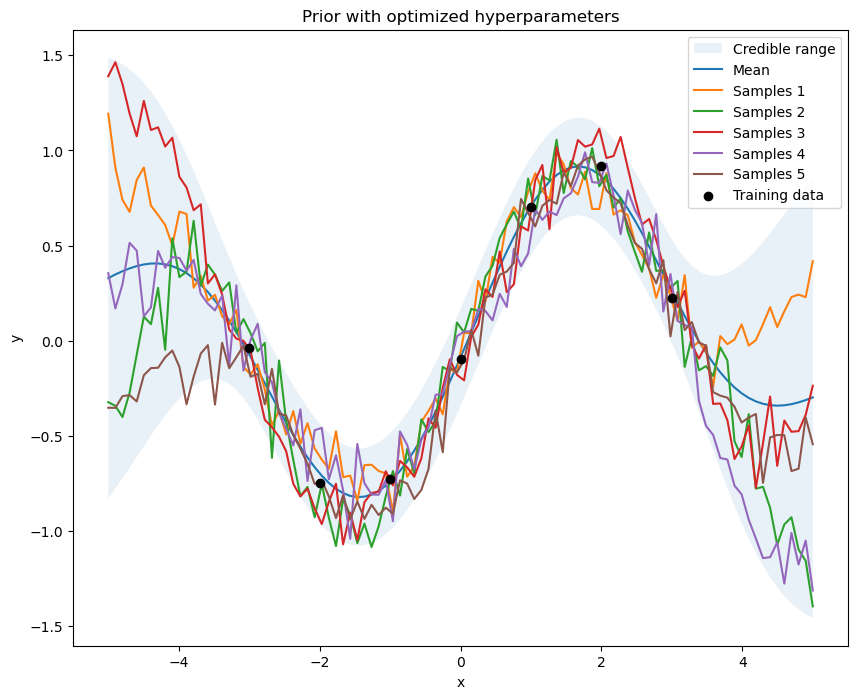

In [18]:
# 
# YOUR CODE HERE
# 
kernel = sklearn.gaussian_process.kernels.ConstantKernel(1.0) * sklearn.gaussian_process.kernels.RBF(length_scale=2.0)
GP = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel, alpha=nugget, optimizer="fmin_l_bfgs_b", normalize_y=False)
GP.fit(X_train, Y_train)

sigma_f_opt = GP.kernel_.k1.get_params()['constant_value']
l_opt = GP.kernel_.k2.get_params()['length_scale']   
print(f'Optimized value for sigma: {sigma_f_opt:.2}')
print(f'Optimized value for l: {l_opt:.3}')

Xp = np.linspace(-5, 5, 100).reshape(-1, 1)
mu_fit, cov_fit = GP.predict(Xp, return_cov=True)

fig, ax = plt.subplots(1,1, figsize=(10, 8))

N, M = np.shape(cov_fit)

cov = cov_fit + nugget*np.eye(N, M)
ax = GPplot(Xp, mu_fit, cov, ax=ax, credibility=0.95, showsamples=True, numsamples=5)
ax.scatter(X_train, Y_train, label='Training data', color='black', zorder=10)
ax.legend()
ax.set_title(r'Prior with optimized hyperparameters')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [19]:
def Predict(X_new, X_train, Y_train, alpha=np.array([1,1]), nugget=0.):
    """
    Computes posterior distribution for a GP regression model
    for input positions X_new.
    
    Args:
        X_new: New input locations. Shape (N_new,1).
        X_train: Training locations, shape (N_train,1).
        Y_train: Training targets, shape (N_train,1).
        alpha: hyperparameters [RBF signal variance, RBF correlation length]
        nugget: Fixed, diagonal white noise variance.
    
    Returns:
        Posterior mean vector (N_new, 1) and covariance matrix (N_new, N_new).
    """
    X_new = np.array(X_new).reshape(-1,1)
    X_train = np.array(X_train).reshape(-1,1)
    Y_train = np.array(Y_train).reshape(-1,1)
        
    # 
    # YOUR CODE HERE
    # 
    cov = cov_RBF(X_new, X_new, alpha=alpha, nugget=nugget)
    return cov
cov = Predict(Xp, X_train, Y_train, alpha=np.array([sigma_f_opt, l_opt]), nugget=nugget)

<Axes: >

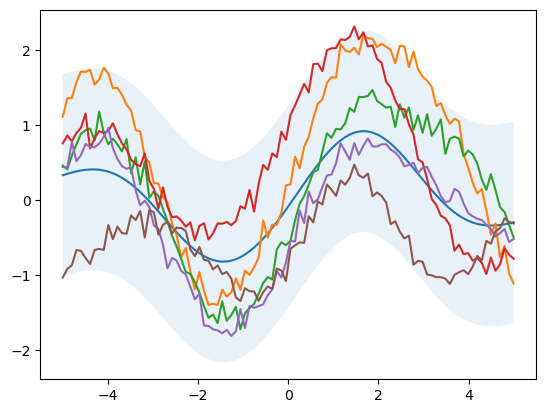

In [20]:
# 
# YOUR CODE HERE
# 
GPplot(Xp, mu_fit, cov, ax=None, credibility=0.95, showsamples=True, numsamples=5)

## Problem 4: Neural network binary classifier (3 points)

There is a physics background to this problem as the data that we will analyze is generated with Monte Carlo simulations of the Ising model. However, you don't need familiarity with the Ising model to solve the data analysis problem.

In [21]:
import numpy as np
from matplotlib import pyplot as plt

### Background

The Ising model is arguably the most famous model in condensed matter physics. It is described by the simple Hamiltonian

$$
H=−J \sum_{\langle i,j \rangle} s_i s_j.
$$

Here, the $s_i=\{−1,1\}$ are classical, binary magnetic moments (spins) sitting on a two-dimensional square lattice and the notation $\langle i,j \rangle$ indicates that $i,j$ are nearest neighbors and that each pair is counted only once. That is the total energy is determined by interactions between neighboring spins only. For simplicity, we will set $J=1$.

Most importantly, the Ising model shows a phase transition between a paramagnetic and a ferromagnetic phase as a function of temperature. The critical temperature $T_c$ at which this change of magnetic character occurs has been calculated exactly by Lars Onsager. He found

$$
T_c = \frac{2}{\log \left( 1 + \sqrt{2} \right) }
$$

In [22]:
Tc = 2 / np.log(1+np.sqrt(2))
print(f"Critical temperature: Tc = {Tc:.4f}")

Critical temperature: Tc = 2.2692


In this problem we aim to reproduce this result (roughly) using a neural-network binary classifier that you implement using `tensorflow` with some ingredients that you test in python methods.

The classification problem can be made more sophisticated by introducing neural networks with several layers. Results from such an analysis made it all the way into a Nature Physics publication: [Nature Physics (2017) 13, 431–434](https://www.nature.com/articles/nphys4035)

We will start by quickly simulating the Ising model using the Monte Carlo method to obtain representative sets of spin configurations for a bunch of temperatures. 

**Monte Carlo simulation**

The Monte Carlo method for the Ising model is very straightforward: take a random configuration of spins to begin with and propose individual spin flips until you run out of steam. To decide whether a spin should be flipped we use the Metropolis criterium
$$
p=\min \left( 1, e^{-\beta\Delta E} \right)
$$
where $\Delta E = E′−E$ is the energy difference between the new (spin flipped) and the old configuration according to $H$ above and $\beta = 1/T$ is the inverse of the temperature $T$. Since $\Delta E$ only depends on the local environment of the spin to be flipped (nearest neighbors), we can evaluate it locally. 

**Generate spin configurations and study the phase transition**

In the python file attached with this notebook we have the definition of a `Lattice` class which can be used to generate a 2D lattice for `N` spins at a temperature `T`. Here, we simply import the `Lattice` class and use the `step` method to generate a lattice after a few hundred iterations to simulate a thermalization of the lattice. 

At every iteration, we select $N^2$ random points to try a flip attempt. A flip attempt consists of checking the change in energy due to a flip. If it is negative or less than $e^{-E/(k_b T)}$, then perform the flip. After a few steps the lattice will thermalize.


***To get this to work you need the `lattice.py` file, which contains the definition of `Lattice`, in the same directory as this notebook***


In [23]:
from lattice import Lattice

In [24]:
# Initialize a lattice
lat = Lattice(N=10, T=4.5)

# Make 30 iterations (N**2 spin flip attempts)
for i in range(30):
    lat.step()

print(lat.lattice) # (or even `print lat` to use the convenient repr)

[[-1 -1 -1 -1  1  1  1  1  1  1]
 [-1 -1 -1  1  1  1  1  1 -1 -1]
 [ 1 -1  1 -1  1  1 -1  1  1  1]
 [ 1 -1 -1  1 -1 -1 -1  1  1 -1]
 [-1  1 -1 -1 -1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1  1 -1  1  1  1]
 [ 1  1  1  1 -1  1 -1 -1  1  1]
 [ 1  1  1  1 -1 -1 -1  1 -1  1]
 [-1 -1  1  1  1  1  1  1  1  1]]


**Illustrate some spin configurations, and plot macroscopic quantities as a function of temperature**

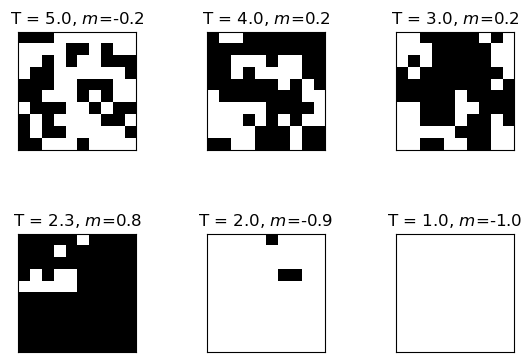

In [25]:
# 10 x 10 lattice
# six temperatures, 500 thermalization iterations
# Plot the spin configurations for varying temperatures.
# Display the magnetization too

nrows, ncols = 2, 3
fig, axs = plt.subplots(nrows, ncols)
fig.subplots_adjust(wspace=0.6)

for (ip, T) in enumerate([5.0, 4.0, 3.0, 2.3, 2.0, 1.0]):
    lat = Lattice(N=10,T=T)
    for k in range(500):
        lat.step()

    idx = ip // ncols, ip % ncols

    axs[idx].matshow(lat.lattice,cmap=plt.cm.gray_r)
    axs[idx].set_title(f"T = {T:.1f}, $m$={lat.get_avg_magnetization():.1f}")

    axs[idx].get_xaxis().set_visible(False)
    axs[idx].get_yaxis().set_visible(False)

In [26]:
# 10 x 10 lattice
# 60 temperatures, 500 thermalization iterations

# For a temperature range, thermalize a lattice, then
# take a few hundred steps, recording energy and magnetization.
# Store the means to plot next.
# This takes about 60s with one reasonably modern computing core.

# Thermalization and measurement steps
ntherm = 500
nmeasure = 200

# points = array with (T, mean(E), abs(mean(M)), var(E))
# with the mean and variance evaluated for a list of many temperatures
points = []
# Storing nmeasure / nsparse data points
nsparse = 10
# points_full = array with (T, E, abs(M))
# for several different configurations per temperature
points_full=[]
for T in np.arange(4.0,1.0,-0.05):
    lat = Lattice(N=10,T=T)
    for _ in range(ntherm):
        lat.step()
    Es = []
    Ms = []

    for istep in range(nmeasure): 
        lat.step()
        Es.append(lat.get_energy())
        Ms.append(lat.get_avg_magnetization())
        if (istep%nsparse==0):
            points_full.append((T,Es[-1],np.abs(Ms[-1])))           
    Es = np.array(Es)
    Ms = np.array(Ms)
    points.append((T,Es.mean(),np.abs(Ms.mean()),Es.var()))
points = np.array(points)
points_full = np.array(points_full)

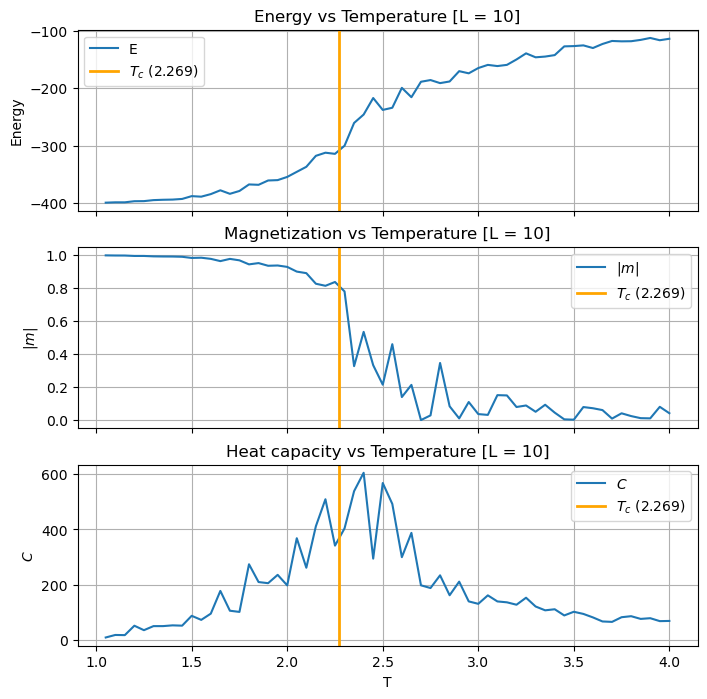

In [27]:
# Plot the energy, magnetization, and heat capacity vs temperature

fig, axs = plt.subplots(3,1,sharex=True,figsize=(8,8))

axs[0].plot(points[:,0],points[:,1], label="E")
axs[0].set_ylabel("Energy")
axs[0].set_title("Energy vs Temperature [L = 10]")

axs[1].plot(points[:,0],points[:,2], label="$|m|$")
axs[1].set_ylabel("$|m|$")
axs[1].set_title("Magnetization vs Temperature [L = 10]")

# heat capacity
# C = var(E) / ( k_B T**2)
heat_capacity = points[:,3] / (points[:,0]**2)
axs[2].plot(points[:,0],heat_capacity, label="$C$")
axs[2].set_xlabel("T")
axs[2].set_ylabel("$C$")
axs[2].set_title("Heat capacity vs Temperature [L = 10]")

for ax in axs:
    ax.axvline(x=Tc,linestyle='-', color="orange",linewidth=2.0, label="$T_c$ ({:.3f})".format(Tc))
    ax.legend(loc="best", numpoints=1)
    ax.grid(True)

**Energy vs magnetization**

Blue data is low temperature ($<T_c$) and red data is high temperature ($>T_c$).

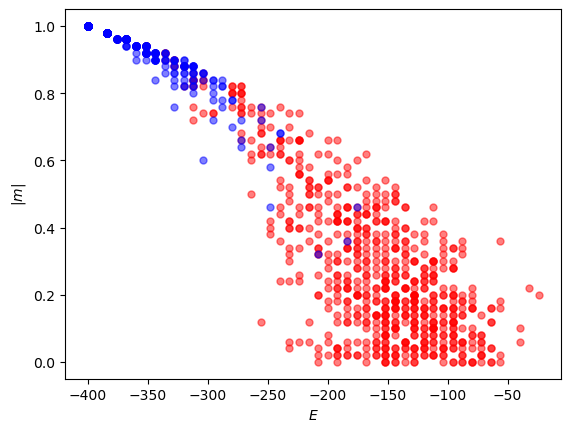

In [28]:
high_T = points_full[:,0]>Tc
low_T = points_full[:,0]<Tc

E_M_high = points_full[high_T][:,1:]
E_M_low = points_full[low_T][:,1:]

fig, ax = plt.subplots(1,1)
ax.scatter(E_M_high[:,0],E_M_high[:,1],c='r',alpha=0.5,s=25)
ax.scatter(E_M_low[:,0],E_M_low[:,1],c='b',alpha=0.5,s=25)
ax.set_xlabel("$E$")
ax.set_ylabel("$|m|$");

# Below is hidden code for saving the data. No solution code is needed here
#
# 
# YOUR CODE HERE
# 

### (a) The sigmoid function and a single neuron

**Tasks (see also Yata)**
- Complete the code below to create a sigmoid function and a single neuron prediction

In [29]:
# Create a sigmoid function and a single neuron
#
def sigmoid(a):
    '''Sigmoid function with input argument a that is the activation'''
    # 
    # YOUR CODE HERE
    # 
    return 1/(1 + np.exp(-a))

def single_neuron(x, w):
    """
    Single neuron prediction, k inputs, 1 output.
    
    Args:
        x (array[float]): input to the neuron. x.shape=(N,k) 
        w (array[float]): weights, w.shape=(k+1,)
            The zero index weight is the bias term.

    Returns:
        y (float): the output of the neuron
    """
    # 
    # YOUR CODE HERE
    # 
    y_in = np.sum(x*w[1:], axis=1) + w[0]
    y_sig = sigmoid(y_in)
    return y_sig

In [30]:
assert sigmoid(0.0)==0.5, f'sigmoid(0.0)={sigmoid(0.0)}!=0.5'
assert (sigmoid(np.zeros(3))==0.5*np.ones(3)).all(), f'The sigmoid function should work with arrays'

x=np.array([[0,0],[1,1],[3,2]])
w=np.array([0.,1.,-1.])
output = single_neuron(x, w)
assert np.abs(output[0]-0.5)<0.01, f'output[0] = {output[0]}'

assert np.abs(output[1]-0.5)<0.01, f'output[1] = {output[1]}'
assert np.abs(output[2]-0.731059)<0.01, f'output[2] = {output[2]}'

### (b) Create a single neuron binary classifier for critical temperature

**Task (see also Yata)**

- Create a binary classifier using `tensorflow.keras` that can take $(E,|m|)$ as input data and predict a binary label (0=below Tc, 1=above Tc).
- Train this model and extract the weights (see hints).
- You should test that your `tensorflow.keras` model gives the same predictions as your own single-neuron classifier from (a).
- How well does it perform? Plot the decision boundary.

**Hints:**
* Normalize the input data before training / testing (mean=0, standard deviation=1).
* Split into 70 % training data and 30% test data.
* Build a binary classifier from a single neuron implemented using a `tensorflow.keras` model. Study the lecture notes and the Demonstration on a neural network classifier.
* Use one input layer (no parameters) and a single neuron in the output layer with a `sigmoid` activation.
* If you label your keras model as `model` then you might want to check with `model.summary()` that you indeed have three trainable parameters.
* When compiling the model, use `loss='binary_crossentropy'` and the 'adam' optimizer. Training should be done with the metrics 'accuracy'.
* You can try with different number of epochs for training, but using at least 100 is reasonable.
* The standard practice is to monitor the loss function and/or the accuracy metric as a function of the epochs for both training and validation data.
* The function `get_weights` can be used to extract parameters from a `tensorflow.keras` model.
* Check visually that the final result looks reasonable by plotting the decision boundary (where Prob(T<Tc)=0.5).
* It is instructive to re-run the model initialization and training to see how different optima are usually found.

In [31]:
import tensorflow as tf
print('You have tensorflow version:', tf.__version__, '(must be at least 2.0.0)')

You have tensorflow version: 2.20.0 (must be at least 2.0.0)


[[ 1.          1.08083481 -1.42842506]
 [ 0.         -0.72567111  0.92950788]
 [ 0.         -1.28151909  1.14386542]
 ...
 [ 1.         -0.16982314  0.55438219]
 [ 0.         -0.8646331   0.98309727]
 [ 1.          1.2892778  -1.42842506]]


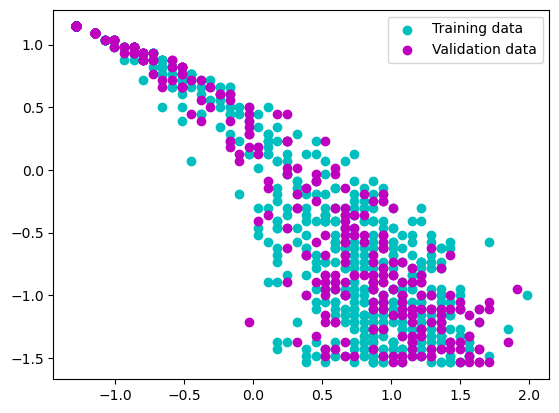

In [32]:
# Split the data and plot
#
# 
# YOUR CODE HERE
# 
dataT = points_full[:,0].copy()
dataEm = points_full[:,1:].copy()

dataT[dataT < Tc] = 0
dataT[dataT > Tc] = 1

mean = np.mean(dataEm, axis=0)
dataEm -= mean
var = np.var(dataEm, axis=0)
dataEm /= np.sqrt(var)

dataT = np.array([dataT]).T
data = np.append(dataT, dataEm, axis=1)

rng = np.random.default_rng()
rng.shuffle(data)

print(data)

N_train = int(0.7*len(dataEm))
data_train = data[:N_train]
data_ver = data[N_train:]

plt.scatter(data_train[:,1], data_train[:,2], color='c', label='Training data')
plt.scatter(data_ver[:,1], data_ver[:,2], color='m', label='Validation data')
plt.legend()
plt.show()

In [33]:
# Create the single neuron binary classifier using tensorflow.keras
#
# 
# YOUR CODE HERE
# 
N, M = np.shape(data_train[:,1:])

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(M,)),
  tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Accuracy for test data: 0.9583333134651184
[ 1.80506158  2.78407812 -1.75021291]


C:\Users\elsaz_6\AppData\Local\Temp\ipykernel_10756\1301455141.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights_keras[0] = model.get_weights()[1]
C:\Users\elsaz_6\AppData\Local\Temp\ipykernel_10756\1301455141.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights_keras[1] = model.get_weights()[0][0]
C:\Users\elsaz_6\AppData\Local\Temp\ipykernel_10756\1301455141.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights_keras[2] = model.get_weigh

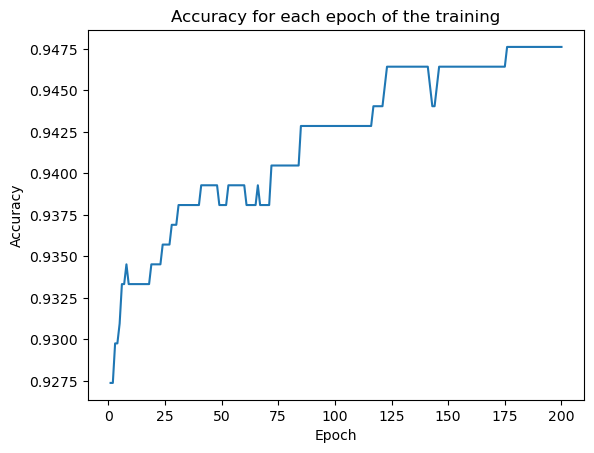

In [34]:
# Train the classifier and test the accuracy on the test set
#
# At the end, the optimum weights can be stored in the array 'weights_keras'
# with element 0 the bias weight, element 1 multiplying the (scaled) energy, and 2 the (scaled) magnetization
weights_keras = np.array([0.,0.,0.])
#
# 
# YOUR CODE HERE
# 
x_train = data_train[:,1:]
y_train = np.array([data_train[:,0]]).T
history = model.fit(x_train, y_train, epochs=200, verbose=0)

acc_history = history.history['accuracy']
epoch = np.arange(1, 200+1)
plt.plot(epoch, acc_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for each epoch of the training')
plt.plot()

x_ver = data_ver[:,1:]
y_ver = np.array([data_ver[:,0]]).T

test_loss, test_acc = model.evaluate(x_ver,  y_ver, verbose=0)
print(f'Accuracy for test data: {test_acc}')

weights_keras[0] = model.get_weights()[1]
weights_keras[1] = model.get_weights()[0][0]
weights_keras[2] = model.get_weights()[0][1]

print(weights_keras)

Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries

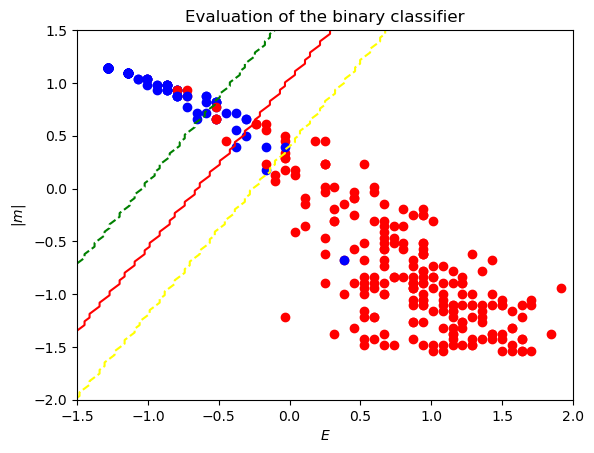

In [35]:
# Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries
#
# 
# YOUR CODE HERE
# 
x = np.linspace(-1.5, 2., 100)
y = np.linspace(-2., 1.5, 100)
X, Y = np.meshgrid(x, y)
grid = np.stack((X.ravel(), Y.ravel())).T

predictions = model.predict(grid, verbose=0).reshape(100,100)

for i in range(len(data_ver)):
    if data_ver[i,0] ==1:
        plt.scatter(data_ver[i,1], data_ver[i,2], color='r')
    else:
        plt.scatter(data_ver[i,1], data_ver[i,2], color='b')

plt.contour(X, Y, predictions < 0.25, linestyles=['dashed'], colors=['green'])
plt.contour(X, Y, predictions < 0.5, colors=['red'])
plt.contour(X, Y, predictions < 0.75, linestyles=['dashed'], colors=['yellow'])
plt.xlabel("$E$")
plt.ylabel("$|m|$")
plt.title('Evaluation of the binary classifier')
plt.show()

In [36]:
assert len(weights_keras)==3, "There should be three parameters for the single neuron binary classifier"
assert np.all(np.abs(weights_keras)<10), "The parameters will be of size ~1 when using normalized input data."
assert weights_keras[0]>0, "The optimum bias term will be positive (Note that input data is scaled)."
assert weights_keras[1]*weights_keras[2]<0, "The two weights will be different sign after optimization (Note that input data is scaled)."

### (c) Create a neural network (single hidden layer) binary classifier for critical temperature

**Task (see also Yata)**

- Repeat the task from (b) to create a binary classifier that can take $(E,|m|)$ as input data and predict a binary label (0=below Tc, 1=above Tc).
- This time use a neural network with a single hidden layer consisting of 128 nodes using the ReLU activation function.
- Again, use one input layer (no parameters) and a single neuron in the output layer with a sigmoid activation.
- How well does it perform? Plot the decision boundary.

**Hints:**
* Use the same data as in task (b).
* There will be an additional layer in your `keras` model. Check the number of trainable parameters. Does it make sense?
* You might need slightly more epochs since there are more parameters. If yuor computer manages, try with 1000 epochs.
* Check visually the decision boundary. Does it look reasonable? What is the striking difference?

In [37]:
# Create the neural network binary classifier using tensorflow.keras
# One hidden layer with 128 neurons
#
# 
# YOUR CODE HERE
# 
N, M = np.shape(data_train[:,1:])

model2 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(shape=(M,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')])

model2.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['accuracy'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

Accuracy for test data: 0.9472222328186035


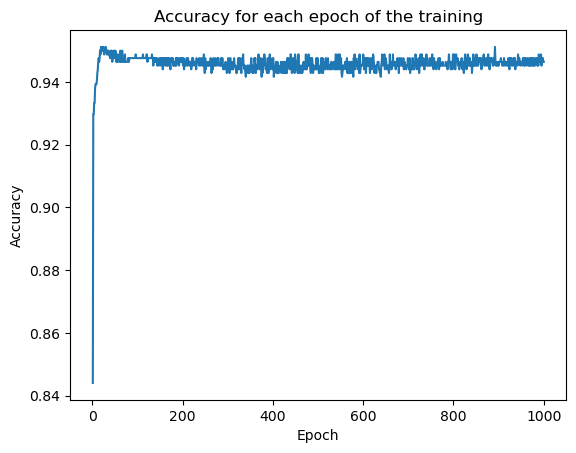

In [38]:
# Train the classifier and test the accuracy on the test set
#
# 
# YOUR CODE HERE
# 
weights_keras2 = np.array([0.,0.,0.])

x_train = data_train[:,1:]
y_train = np.array([data_train[:,0]]).T
history2 = model2.fit(x_train, y_train, epochs=1000,verbose=0)

acc_history2 = history2.history['accuracy']
epoch = np.arange(1, 1000+1)
plt.plot(epoch, acc_history2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for each epoch of the training')
plt.plot()

x_ver = data_ver[:,1:]
y_ver = np.array([data_ver[:,0]]).T

test_loss2, test_acc2 = model2.evaluate(x_ver,  y_ver, verbose=0)
print(f'Accuracy for test data: {test_acc2}')

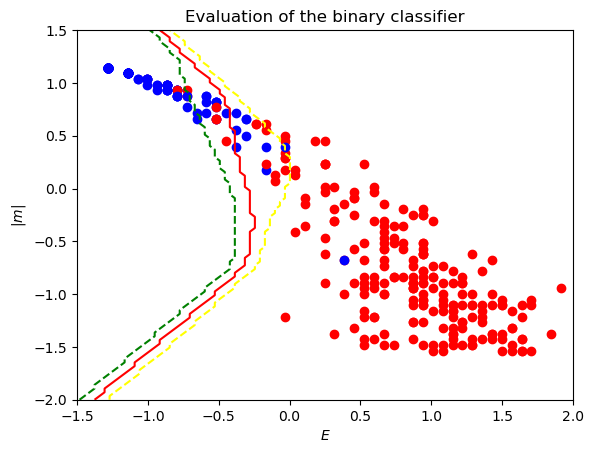

In [39]:
# Evaluate the final binary classifier and plot the 25%, 50%, 75% decision boundaries
#
# 
# YOUR CODE HERE
# 
x = np.linspace(-1.5, 2., 100)
y = np.linspace(-2., 1.5, 100)
X, Y = np.meshgrid(x, y)
grid = np.stack((X.ravel(), Y.ravel())).T

def contour_levels(grid):
    """Compute 1, 2, 3-sigma contour levels for a gridded 2D pdf"""
    _sorted = np.sort(grid.ravel())[::-1]
    pct = np.cumsum(_sorted) / np.sum(_sorted)
    cutoffs = np.searchsorted(pct, np.array([0.25, 0.5, 0.75]))
    return np.sort(_sorted[cutoffs])

predictions2 = model2.predict(grid, verbose=0).reshape(100,100)

for i in range(len(data_ver)):
    if data_ver[i,0] ==1:
        plt.scatter(data_ver[i,1], data_ver[i,2], color='r')
    else:
        plt.scatter(data_ver[i,1], data_ver[i,2], color='b')
        
plt.contour(X, Y, predictions2 < 0.25, linestyles=['dashed'], colors=['green'])
plt.contour(X, Y, predictions2 < 0.5, colors=['red'])
plt.contour(X, Y, predictions2 < 0.75, linestyles=['dashed'], colors=['yellow'])
plt.xlabel("$E$")
plt.ylabel("$|m|$")
plt.title('Evaluation of the binary classifier')
plt.show()